In [3]:
import numpy as np
import sklearn
import pandas as pd

In [4]:
df=pd.read_csv('Titanic-Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#Age null value can be replaced by mean or median
#cabin has too many null values, so drop it
#embarked has only two null values so lets fill nearer value
df['Age'].fillna(df['Age'].median(),inplace=True)
df.drop('Cabin',axis=1,inplace=True)

In [8]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [9]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
#computer don't understand object values ,which need to be convert to numerical values
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['Sex']=label.fit_transform(df['Sex'])
#Embarked has 3 values ,one value will be dropped
df=pd.get_dummies(df,columns=['Embarked'],drop_first=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked_Q   891 non-null    uint8  
 11  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int32(1), int64(5), object(2), uint8(2)
memory usage: 68.0+ KB


In [12]:
#Name is also object and everyone has diff names, we focus on 'mr.,mrs.Dr,etc' extract them from names
df['Title']=df['Name'].str.extract('([A-Za-z]+)\.',expand=False)
print(df['Title'].unique())
df['Title']=df['Title'].replace(['Dr','Rev','Col','Major','Capt','Jonkheer','Countess','Sir','Lady'],'Others')
df['Title']=df['Title'].replace('Mlle','Miss')
df['Title']=df['Title'].replace('Ms','Miss')
df['Title']=df['Title'].replace('Mme','Mrs')
print(df['Title'].unique())
df['Title']=label.fit_transform(df['Title'])
df.drop('Name',axis=1,inplace=True)

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']
['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Others']


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked_Q   891 non-null    uint8  
 10  Embarked_S   891 non-null    uint8  
 11  Title        891 non-null    int32  
dtypes: float64(2), int32(2), int64(5), object(1), uint8(2)
memory usage: 64.5+ KB


In [14]:
#Drop ticket as it will not provide much of the information
df.drop('Ticket',axis=1,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked_Q   891 non-null    uint8  
 9   Embarked_S   891 non-null    uint8  
 10  Title        891 non-null    int32  
dtypes: float64(2), int32(2), int64(5), uint8(2)
memory usage: 57.6 KB


In [16]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Title
0,1,0,3,1,22.0,1,0,7.2500,0,1,3
1,2,1,1,0,38.0,1,0,71.2833,0,0,4
2,3,1,3,0,26.0,0,0,7.9250,0,1,2
3,4,1,1,0,35.0,1,0,53.1000,0,1,4
4,5,0,3,1,35.0,0,0,8.0500,0,1,3


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X=df.drop('Survived',axis=1)
Y=df['Survived']

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression
logic=LogisticRegression(max_iter=200)
logic.fit(X_train,Y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [30]:
Y_pred=logic.predict(X_test)

In [31]:

print(f"The prediction is:{Y_pred}")

The prediction is:[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1]


In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy=accuracy_score(Y_test,Y_pred)
confusion=confusion_matrix(Y_test,Y_pred)
print(f"The Accuracy is:{accuracy}")
print(f"The Confusion Matix is:\n",confusion)

The Accuracy is:0.8044692737430168
The Confusion Matix is:
 [[91 14]
 [21 53]]


In [33]:
comparison=pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred})
print(comparison.head())

     Actual  Predicted
709       1          0
439       0          0
840       0          0
720       1          1
39        1          1


In [47]:
new_passenger=pd.DataFrame({
    'Age':[35],
    'Sex':[0],#Gender is female
    'Pclass':[1],
    'Title':[4],#represents mrs
    'Embarked_Q':[0],
    'Embarked_S':[1],
    'PassengerId':[4],
    'SibSp':[1],
    'Parch':[0],
    'Fare':[53.1000]
})


In [48]:

new_pred=logic.predict(new_passenger)
print("Survived" if new_pred[0]==1 else "Not Survived")

Not Survived


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


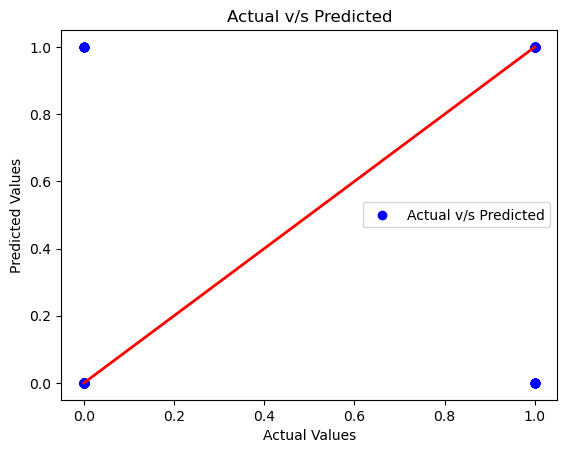

In [51]:
import matplotlib.pyplot as plt
plt.title("Actual v/s Predicted")
plt.scatter(Y_test,Y_pred,color='blue',label="Actual v/s Predicted")
plt.plot([min(Y_test),max(Y_test)],[min(Y_test),max(Y_test)],color='red',lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()